In [78]:
# multivariate multi-step data preparation
import numpy as np
from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Conv1D,MaxPooling1D, Flatten
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('dasatest.csv')
df['Month'] = pd.to_datetime(df.Month , format = '%d/%m/%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
cols = data.columns
data = np.array(data)
data_10 = data[:,:10]
df_train = data_10

scaler = StandardScaler()
scaler = scaler.fit(df_train)
train_scaled = scaler.transform(df_train)
data_scaled = train_scaled[:,:]
print(data_scaled)


[[-7.12301412e-01 -8.76552372e-01 -1.15342226e+00 -9.57486956e-01
  -9.65138851e-01 -1.01910408e+00 -7.20801804e-01 -9.57475801e-01
  -8.96088090e-01 -1.01689824e+00]
 [-9.72195540e-01 -8.75509047e-01 -1.27339233e+00 -1.00338327e+00
  -9.87679038e-01 -7.30115428e-01 -1.06773766e+00 -1.03902425e+00
  -9.06444060e-01 -1.04487672e+00]
 [-9.33472316e-01 -9.33606105e-01 -1.03553374e+00 -9.65550524e-01
  -8.64985990e-01 -7.22579399e-01 -1.04251813e+00 -9.33670561e-01
  -6.95036000e-01 -9.57745232e-01]
 [ 2.15952874e+00  8.70672428e-01  1.97963328e-01  1.43830500e-01
   7.62218681e-01 -6.71246172e-02 -5.18234264e-01 -4.91973071e-01
   8.14010248e-01 -4.75907493e-01]
 [-1.13223024e+00 -1.05314933e+00 -9.19019946e-01 -5.00757980e-01
  -3.13038528e-01 -1.34570575e+00 -1.34954828e+00 -8.73234295e-01
  -1.10080535e+00 -8.49892779e-01]
 [-1.55872727e+00 -1.53877433e+00 -2.37668451e+00 -1.51587215e+00
  -1.24844259e+00 -9.28057564e-01 -2.06869521e+00 -1.31614784e+00
  -1.01331424e+00 -1.03983269e+00

In [79]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
n_steps_in, n_steps_out = 12 ,15 
# covert into input/output
X, y = split_sequences(data_scaled, n_steps_in, n_steps_out)
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
print(X.shape, y.shape)
# summarize the data

(46, 12, 10) (46, 150)


In [80]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# model.add(Dense(150, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 10, 128)           3968      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 640)               0         
                                                                 
 dense_8 (Dense)             (None, 150)               96150     
                                                                 
Total params: 100,118
Trainable params: 100,118
Non-trainable params: 0
_________________________________________________________________


In [81]:
# fit model
history = model.fit(X, y, epochs=10000, verbose=1)

Epoch 1/10000
2/2 [==============================] - 0s 3ms/step - loss: 1172.1722
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 1081.0555
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 779.8759
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 509.0363
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 444.4009
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 489.2560
Epoch 7/10000
2/2 [==============================] - 0s 3ms/step - loss: 615.8993
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 592.1075
Epoch 9/10000
2/2 [==============================] - 0s 2ms/step - loss: 500.2631
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 360.5037
Epoch 11/10000
2/2 [==============================] - 0s 3ms/step - loss: 451.2653
Epoch 12/10000
2/2 [==============================] - 0s 2ms/step - loss: 389.3248
Epoch 13/10

2/2 [==============================] - 0s 2ms/step - loss: 204.3345
Epoch 100/10000
2/2 [==============================] - 0s 2ms/step - loss: 162.7706
Epoch 101/10000
2/2 [==============================] - 0s 2ms/step - loss: 139.6429
Epoch 102/10000
2/2 [==============================] - 0s 2ms/step - loss: 188.7545
Epoch 103/10000
2/2 [==============================] - 0s 2ms/step - loss: 230.0095
Epoch 104/10000
2/2 [==============================] - 0s 2ms/step - loss: 219.7207
Epoch 105/10000
2/2 [==============================] - 0s 3ms/step - loss: 181.7721
Epoch 106/10000
2/2 [==============================] - 0s 2ms/step - loss: 204.2837
Epoch 107/10000
2/2 [==============================] - 0s 2ms/step - loss: 192.9445
Epoch 108/10000
2/2 [==============================] - 0s 2ms/step - loss: 181.6386
Epoch 109/10000
2/2 [==============================] - 0s 3ms/step - loss: 207.8425
Epoch 110/10000
2/2 [==============================] - 0s 996us/step - loss: 209.9642
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 169.9073
Epoch 197/10000
2/2 [==============================] - 0s 3ms/step - loss: 157.6403
Epoch 198/10000
2/2 [==============================] - 0s 997us/step - loss: 190.6887
Epoch 199/10000
2/2 [==============================] - 0s 2ms/step - loss: 187.0269
Epoch 200/10000
2/2 [==============================] - 0s 2ms/step - loss: 178.2925
Epoch 201/10000
2/2 [==============================] - 0s 2ms/step - loss: 198.1550
Epoch 202/10000
2/2 [==============================] - 0s 2ms/step - loss: 186.9227
Epoch 203/10000
2/2 [==============================] - 0s 2ms/step - loss: 217.1124
Epoch 204/10000
2/2 [==============================] - 0s 2ms/step - loss: 176.2471
Epoch 205/10000
2/2 [==============================] - 0s 2ms/step - loss: 156.7576
Epoch 206/10000
2/2 [==============================] - 0s 998us/step - loss: 177.4707
Epoch 207/10000
2/2 [==============================] - 0s 2ms/step - loss: 187.4332
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 131.6637
Epoch 294/10000
2/2 [==============================] - 0s 997us/step - loss: 121.5675
Epoch 295/10000
2/2 [==============================] - 0s 997us/step - loss: 133.2960
Epoch 296/10000
2/2 [==============================] - 0s 996us/step - loss: 121.2040
Epoch 297/10000
2/2 [==============================] - 0s 2ms/step - loss: 123.2423
Epoch 298/10000
2/2 [==============================] - 0s 2ms/step - loss: 119.1882
Epoch 299/10000
2/2 [==============================] - 0s 996us/step - loss: 107.6280
Epoch 300/10000
2/2 [==============================] - 0s 2ms/step - loss: 127.8264
Epoch 301/10000
2/2 [==============================] - 0s 998us/step - loss: 114.5078
Epoch 302/10000
2/2 [==============================] - 0s 996us/step - loss: 114.5016
Epoch 303/10000
2/2 [==============================] - 0s 2ms/step - loss: 108.8296
Epoch 304/10000
2/2 [==============================] - 0s 3ms/step - loss: 119.5

2/2 [==============================] - 0s 997us/step - loss: 113.6877
Epoch 391/10000
2/2 [==============================] - 0s 2ms/step - loss: 133.5910
Epoch 392/10000
2/2 [==============================] - 0s 997us/step - loss: 134.1719
Epoch 393/10000
2/2 [==============================] - 0s 2ms/step - loss: 127.2767
Epoch 394/10000
2/2 [==============================] - 0s 997us/step - loss: 130.9969
Epoch 395/10000
2/2 [==============================] - 0s 2ms/step - loss: 106.8747
Epoch 396/10000
2/2 [==============================] - 0s 2ms/step - loss: 106.1242
Epoch 397/10000
2/2 [==============================] - 0s 2ms/step - loss: 130.3981
Epoch 398/10000
2/2 [==============================] - 0s 998us/step - loss: 127.8190
Epoch 399/10000
2/2 [==============================] - 0s 999us/step - loss: 111.0971
Epoch 400/10000
2/2 [==============================] - 0s 3ms/step - loss: 124.4976
Epoch 401/10000
2/2 [==============================] - 0s 2ms/step - loss: 106.516

2/2 [==============================] - 0s 2ms/step - loss: 110.8681
Epoch 488/10000
2/2 [==============================] - 0s 2ms/step - loss: 112.8079
Epoch 489/10000
2/2 [==============================] - 0s 996us/step - loss: 100.0000
Epoch 490/10000
2/2 [==============================] - 0s 997us/step - loss: 101.8898
Epoch 491/10000
2/2 [==============================] - 0s 2ms/step - loss: 108.6230
Epoch 492/10000
2/2 [==============================] - 0s 2ms/step - loss: 115.4064
Epoch 493/10000
2/2 [==============================] - 0s 2ms/step - loss: 111.5011
Epoch 494/10000
2/2 [==============================] - 0s 996us/step - loss: 77.6123
Epoch 495/10000
2/2 [==============================] - 0s 2ms/step - loss: 89.8091
Epoch 496/10000
2/2 [==============================] - 0s 997us/step - loss: 124.9873
Epoch 497/10000
2/2 [==============================] - 0s 2ms/step - loss: 123.0805
Epoch 498/10000
2/2 [==============================] - 0s 997us/step - loss: 105.7322


2/2 [==============================] - 0s 2ms/step - loss: 86.4386
Epoch 585/10000
2/2 [==============================] - 0s 2ms/step - loss: 94.4537
Epoch 586/10000
2/2 [==============================] - 0s 2ms/step - loss: 96.8695
Epoch 587/10000
2/2 [==============================] - 0s 997us/step - loss: 108.4389
Epoch 588/10000
2/2 [==============================] - 0s 2ms/step - loss: 92.9870
Epoch 589/10000
2/2 [==============================] - 0s 2ms/step - loss: 93.0032
Epoch 590/10000
2/2 [==============================] - 0s 996us/step - loss: 104.6002
Epoch 591/10000
2/2 [==============================] - 0s 997us/step - loss: 92.9771
Epoch 592/10000
2/2 [==============================] - 0s 2ms/step - loss: 105.7677
Epoch 593/10000
2/2 [==============================] - 0s 2ms/step - loss: 100.4258
Epoch 594/10000
2/2 [==============================] - 0s 2ms/step - loss: 88.5970
Epoch 595/10000
2/2 [==============================] - 0s 2ms/step - loss: 99.1809
Epoch 596/

2/2 [==============================] - 0s 2ms/step - loss: 103.5365
Epoch 682/10000
2/2 [==============================] - 0s 997us/step - loss: 93.6048
Epoch 683/10000
2/2 [==============================] - 0s 2ms/step - loss: 86.2687
Epoch 684/10000
2/2 [==============================] - 0s 2ms/step - loss: 94.0481
Epoch 685/10000
2/2 [==============================] - 0s 997us/step - loss: 91.7988
Epoch 686/10000
2/2 [==============================] - 0s 2ms/step - loss: 91.9963
Epoch 687/10000
2/2 [==============================] - 0s 2ms/step - loss: 89.5586
Epoch 688/10000
2/2 [==============================] - 0s 2ms/step - loss: 89.2120
Epoch 689/10000
2/2 [==============================] - 0s 998us/step - loss: 97.3105
Epoch 690/10000
2/2 [==============================] - 0s 997us/step - loss: 106.9096
Epoch 691/10000
2/2 [==============================] - 0s 2ms/step - loss: 91.1469
Epoch 692/10000
2/2 [==============================] - 0s 2ms/step - loss: 89.4988
Epoch 693/

2/2 [==============================] - 0s 997us/step - loss: 87.9180
Epoch 780/10000
2/2 [==============================] - 0s 2ms/step - loss: 86.3884
Epoch 781/10000
2/2 [==============================] - 0s 2ms/step - loss: 95.8385
Epoch 782/10000
2/2 [==============================] - 0s 2ms/step - loss: 90.3459
Epoch 783/10000
2/2 [==============================] - 0s 2ms/step - loss: 72.9289
Epoch 784/10000
2/2 [==============================] - 0s 2ms/step - loss: 80.5981
Epoch 785/10000
2/2 [==============================] - 0s 2ms/step - loss: 94.3785
Epoch 786/10000
2/2 [==============================] - 0s 2ms/step - loss: 82.8980
Epoch 787/10000
2/2 [==============================] - 0s 2ms/step - loss: 97.2633
Epoch 788/10000
2/2 [==============================] - 0s 2ms/step - loss: 91.7432
Epoch 789/10000
2/2 [==============================] - 0s 3ms/step - loss: 79.6175
Epoch 790/10000
2/2 [==============================] - 0s 2ms/step - loss: 85.1244
Epoch 791/10000
2/

2/2 [==============================] - 0s 2ms/step - loss: 74.5932
Epoch 878/10000
2/2 [==============================] - 0s 2ms/step - loss: 69.2322
Epoch 879/10000
2/2 [==============================] - 0s 997us/step - loss: 85.2034
Epoch 880/10000
2/2 [==============================] - 0s 2ms/step - loss: 81.0843
Epoch 881/10000
2/2 [==============================] - 0s 2ms/step - loss: 76.9835
Epoch 882/10000
2/2 [==============================] - 0s 3ms/step - loss: 73.4866
Epoch 883/10000
2/2 [==============================] - 0s 2ms/step - loss: 75.7555
Epoch 884/10000
2/2 [==============================] - 0s 2ms/step - loss: 73.4586
Epoch 885/10000
2/2 [==============================] - 0s 2ms/step - loss: 75.7074
Epoch 886/10000
2/2 [==============================] - 0s 996us/step - loss: 75.5865
Epoch 887/10000
2/2 [==============================] - 0s 2ms/step - loss: 64.9256
Epoch 888/10000
2/2 [==============================] - 0s 2ms/step - loss: 73.5772
Epoch 889/10000


2/2 [==============================] - 0s 2ms/step - loss: 55.4230
Epoch 976/10000
2/2 [==============================] - 0s 2ms/step - loss: 61.2742
Epoch 977/10000
2/2 [==============================] - 0s 2ms/step - loss: 67.2938
Epoch 978/10000
2/2 [==============================] - 0s 996us/step - loss: 75.7681
Epoch 979/10000
2/2 [==============================] - 0s 997us/step - loss: 74.1054
Epoch 980/10000
2/2 [==============================] - 0s 997us/step - loss: 60.9122
Epoch 981/10000
2/2 [==============================] - 0s 2ms/step - loss: 61.3921
Epoch 982/10000
2/2 [==============================] - 0s 2ms/step - loss: 73.4390
Epoch 983/10000
2/2 [==============================] - 0s 997us/step - loss: 69.1824
Epoch 984/10000
2/2 [==============================] - 0s 3ms/step - loss: 68.0372
Epoch 985/10000
2/2 [==============================] - 0s 2ms/step - loss: 82.8581
Epoch 986/10000
2/2 [==============================] - 0s 997us/step - loss: 81.2256
Epoch 987/

2/2 [==============================] - 0s 2ms/step - loss: 78.7585
Epoch 1073/10000
2/2 [==============================] - 0s 997us/step - loss: 66.6739
Epoch 1074/10000
2/2 [==============================] - 0s 2ms/step - loss: 75.2700
Epoch 1075/10000
2/2 [==============================] - 0s 2ms/step - loss: 86.9417
Epoch 1076/10000
2/2 [==============================] - 0s 996us/step - loss: 81.6041
Epoch 1077/10000
2/2 [==============================] - 0s 2ms/step - loss: 83.4587
Epoch 1078/10000
2/2 [==============================] - 0s 3ms/step - loss: 90.4806
Epoch 1079/10000
2/2 [==============================] - 0s 2ms/step - loss: 94.0665
Epoch 1080/10000
2/2 [==============================] - 0s 997us/step - loss: 85.8825
Epoch 1081/10000
2/2 [==============================] - 0s 2ms/step - loss: 69.7098
Epoch 1082/10000
2/2 [==============================] - 0s 2ms/step - loss: 77.7804
Epoch 1083/10000
2/2 [==============================] - 0s 2ms/step - loss: 80.3692
Epo

2/2 [==============================] - 0s 2ms/step - loss: 62.0451
Epoch 1170/10000
2/2 [==============================] - 0s 2ms/step - loss: 75.9373
Epoch 1171/10000
2/2 [==============================] - 0s 2ms/step - loss: 79.5089
Epoch 1172/10000
2/2 [==============================] - 0s 2ms/step - loss: 72.3603
Epoch 1173/10000
2/2 [==============================] - 0s 997us/step - loss: 72.7198
Epoch 1174/10000
2/2 [==============================] - 0s 998us/step - loss: 77.8443
Epoch 1175/10000
2/2 [==============================] - 0s 3ms/step - loss: 76.6216
Epoch 1176/10000
2/2 [==============================] - 0s 2ms/step - loss: 81.2811
Epoch 1177/10000
2/2 [==============================] - 0s 997us/step - loss: 75.0701
Epoch 1178/10000
2/2 [==============================] - 0s 997us/step - loss: 75.3647
Epoch 1179/10000
2/2 [==============================] - 0s 3ms/step - loss: 76.6391
Epoch 1180/10000
2/2 [==============================] - 0s 997us/step - loss: 73.2554

2/2 [==============================] - 0s 997us/step - loss: 63.9908
Epoch 1267/10000
2/2 [==============================] - 0s 2ms/step - loss: 62.5106
Epoch 1268/10000
2/2 [==============================] - 0s 2ms/step - loss: 57.8327
Epoch 1269/10000
2/2 [==============================] - 0s 2ms/step - loss: 64.3859
Epoch 1270/10000
2/2 [==============================] - 0s 2ms/step - loss: 65.5895
Epoch 1271/10000
2/2 [==============================] - 0s 996us/step - loss: 57.5922
Epoch 1272/10000
2/2 [==============================] - 0s 997us/step - loss: 64.3568
Epoch 1273/10000
2/2 [==============================] - 0s 2ms/step - loss: 67.6208
Epoch 1274/10000
2/2 [==============================] - 0s 996us/step - loss: 59.3977
Epoch 1275/10000
2/2 [==============================] - 0s 2ms/step - loss: 65.4559
Epoch 1276/10000
2/2 [==============================] - 0s 2ms/step - loss: 74.9797
Epoch 1277/10000
2/2 [==============================] - 0s 2ms/step - loss: 70.9864
E

2/2 [==============================] - 0s 3ms/step - loss: 74.6103
Epoch 1364/10000
2/2 [==============================] - 0s 2ms/step - loss: 75.4015
Epoch 1365/10000
2/2 [==============================] - 0s 997us/step - loss: 67.7815
Epoch 1366/10000
2/2 [==============================] - 0s 2ms/step - loss: 73.9872
Epoch 1367/10000
2/2 [==============================] - 0s 997us/step - loss: 69.6154
Epoch 1368/10000
2/2 [==============================] - 0s 2ms/step - loss: 57.4951
Epoch 1369/10000
2/2 [==============================] - 0s 2ms/step - loss: 49.3632
Epoch 1370/10000
2/2 [==============================] - 0s 2ms/step - loss: 58.1326
Epoch 1371/10000
2/2 [==============================] - 0s 2ms/step - loss: 55.6559
Epoch 1372/10000
2/2 [==============================] - 0s 2ms/step - loss: 55.5249
Epoch 1373/10000
2/2 [==============================] - 0s 2ms/step - loss: 54.2665
Epoch 1374/10000
2/2 [==============================] - 0s 2ms/step - loss: 47.2983
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 61.8685
Epoch 1461/10000
2/2 [==============================] - 0s 2ms/step - loss: 68.2663
Epoch 1462/10000
2/2 [==============================] - 0s 998us/step - loss: 56.6912
Epoch 1463/10000
2/2 [==============================] - 0s 998us/step - loss: 62.9639
Epoch 1464/10000
2/2 [==============================] - 0s 2ms/step - loss: 78.3622
Epoch 1465/10000
2/2 [==============================] - 0s 2ms/step - loss: 74.4934
Epoch 1466/10000
2/2 [==============================] - 0s 998us/step - loss: 62.3337
Epoch 1467/10000
2/2 [==============================] - 0s 2ms/step - loss: 55.8118
Epoch 1468/10000
2/2 [==============================] - 0s 2ms/step - loss: 52.6913
Epoch 1469/10000
2/2 [==============================] - 0s 2ms/step - loss: 57.8649
Epoch 1470/10000
2/2 [==============================] - 0s 2ms/step - loss: 66.2941
Epoch 1471/10000
2/2 [==============================] - 0s 997us/step - loss: 64.1374
E

2/2 [==============================] - 0s 2ms/step - loss: 59.0832
Epoch 1558/10000
2/2 [==============================] - 0s 2ms/step - loss: 55.2944
Epoch 1559/10000
2/2 [==============================] - 0s 997us/step - loss: 50.7530
Epoch 1560/10000
2/2 [==============================] - 0s 2ms/step - loss: 54.1622
Epoch 1561/10000
2/2 [==============================] - 0s 4ms/step - loss: 53.1735
Epoch 1562/10000
2/2 [==============================] - 0s 2ms/step - loss: 61.5674
Epoch 1563/10000
2/2 [==============================] - 0s 4ms/step - loss: 64.1487
Epoch 1564/10000
2/2 [==============================] - 0s 2ms/step - loss: 53.6351
Epoch 1565/10000
2/2 [==============================] - 0s 2ms/step - loss: 51.5812
Epoch 1566/10000
2/2 [==============================] - 0s 2ms/step - loss: 52.9407
Epoch 1567/10000
2/2 [==============================] - 0s 2ms/step - loss: 63.4217
Epoch 1568/10000
2/2 [==============================] - 0s 3ms/step - loss: 59.8939
Epoch 1

2/2 [==============================] - 0s 2ms/step - loss: 65.2316
Epoch 1655/10000
2/2 [==============================] - 0s 2ms/step - loss: 61.0253
Epoch 1656/10000
2/2 [==============================] - 0s 2ms/step - loss: 46.3507
Epoch 1657/10000
2/2 [==============================] - 0s 2ms/step - loss: 46.2683
Epoch 1658/10000
2/2 [==============================] - 0s 2ms/step - loss: 51.6371
Epoch 1659/10000
2/2 [==============================] - 0s 997us/step - loss: 56.3203
Epoch 1660/10000
2/2 [==============================] - 0s 2ms/step - loss: 48.4213
Epoch 1661/10000
2/2 [==============================] - 0s 2ms/step - loss: 52.5825
Epoch 1662/10000
2/2 [==============================] - 0s 2ms/step - loss: 49.4797
Epoch 1663/10000
2/2 [==============================] - 0s 2ms/step - loss: 48.0531
Epoch 1664/10000
2/2 [==============================] - 0s 2ms/step - loss: 55.8836
Epoch 1665/10000
2/2 [==============================] - 0s 2ms/step - loss: 58.0725
Epoch 1

2/2 [==============================] - 0s 3ms/step - loss: 47.1316
Epoch 1752/10000
2/2 [==============================] - 0s 3ms/step - loss: 48.0415
Epoch 1753/10000
2/2 [==============================] - 0s 2ms/step - loss: 50.4970
Epoch 1754/10000
2/2 [==============================] - 0s 997us/step - loss: 57.2959
Epoch 1755/10000
2/2 [==============================] - 0s 2ms/step - loss: 52.7294
Epoch 1756/10000
2/2 [==============================] - 0s 3ms/step - loss: 44.8263
Epoch 1757/10000
2/2 [==============================] - 0s 2ms/step - loss: 50.2228
Epoch 1758/10000
2/2 [==============================] - 0s 2ms/step - loss: 53.6080
Epoch 1759/10000
2/2 [==============================] - 0s 3ms/step - loss: 52.0769
Epoch 1760/10000
2/2 [==============================] - 0s 2ms/step - loss: 44.4992
Epoch 1761/10000
2/2 [==============================] - 0s 996us/step - loss: 44.1210
Epoch 1762/10000
2/2 [==============================] - 0s 996us/step - loss: 44.9745
Epo

2/2 [==============================] - 0s 2ms/step - loss: 44.0691
Epoch 1849/10000
2/2 [==============================] - 0s 996us/step - loss: 39.1774
Epoch 1850/10000
2/2 [==============================] - 0s 3ms/step - loss: 41.9959
Epoch 1851/10000
2/2 [==============================] - 0s 996us/step - loss: 50.5357
Epoch 1852/10000
2/2 [==============================] - 0s 2ms/step - loss: 50.5666
Epoch 1853/10000
2/2 [==============================] - 0s 2ms/step - loss: 50.3318
Epoch 1854/10000
2/2 [==============================] - 0s 2ms/step - loss: 48.0534
Epoch 1855/10000
2/2 [==============================] - 0s 2ms/step - loss: 46.8581
Epoch 1856/10000
2/2 [==============================] - 0s 2ms/step - loss: 52.6642
Epoch 1857/10000
2/2 [==============================] - 0s 2ms/step - loss: 48.8916
Epoch 1858/10000
2/2 [==============================] - 0s 2ms/step - loss: 51.3052
Epoch 1859/10000
2/2 [==============================] - 0s 996us/step - loss: 48.2653
Epo

2/2 [==============================] - 0s 2ms/step - loss: 50.2710
Epoch 1946/10000
2/2 [==============================] - 0s 2ms/step - loss: 53.3534
Epoch 1947/10000
2/2 [==============================] - 0s 997us/step - loss: 55.1502
Epoch 1948/10000
2/2 [==============================] - 0s 2ms/step - loss: 43.6957
Epoch 1949/10000
2/2 [==============================] - 0s 997us/step - loss: 43.0321
Epoch 1950/10000
2/2 [==============================] - 0s 997us/step - loss: 45.5065
Epoch 1951/10000
2/2 [==============================] - 0s 2ms/step - loss: 44.5132
Epoch 1952/10000
2/2 [==============================] - 0s 3ms/step - loss: 43.9178
Epoch 1953/10000
2/2 [==============================] - 0s 2ms/step - loss: 41.7348
Epoch 1954/10000
2/2 [==============================] - 0s 1ms/step - loss: 43.7199
Epoch 1955/10000
2/2 [==============================] - 0s 996us/step - loss: 43.6627
Epoch 1956/10000
2/2 [==============================] - 0s 3ms/step - loss: 39.7267
E

2/2 [==============================] - 0s 3ms/step - loss: 48.9635
Epoch 2043/10000
2/2 [==============================] - 0s 3ms/step - loss: 40.6516
Epoch 2044/10000
2/2 [==============================] - 0s 2ms/step - loss: 39.3196
Epoch 2045/10000
2/2 [==============================] - 0s 2ms/step - loss: 44.9119
Epoch 2046/10000
2/2 [==============================] - 0s 996us/step - loss: 45.7294
Epoch 2047/10000
2/2 [==============================] - 0s 997us/step - loss: 44.5486
Epoch 2048/10000
2/2 [==============================] - 0s 3ms/step - loss: 43.3207
Epoch 2049/10000
2/2 [==============================] - 0s 2ms/step - loss: 49.9120
Epoch 2050/10000
2/2 [==============================] - 0s 997us/step - loss: 42.5165
Epoch 2051/10000
2/2 [==============================] - 0s 2ms/step - loss: 43.2010
Epoch 2052/10000
2/2 [==============================] - 0s 2ms/step - loss: 41.8806
Epoch 2053/10000
2/2 [==============================] - 0s 2ms/step - loss: 40.0741
Epo

2/2 [==============================] - 0s 2ms/step - loss: 39.4752
Epoch 2140/10000
2/2 [==============================] - 0s 3ms/step - loss: 34.2810
Epoch 2141/10000
2/2 [==============================] - 0s 3ms/step - loss: 44.2882
Epoch 2142/10000
2/2 [==============================] - 0s 2ms/step - loss: 41.7187
Epoch 2143/10000
2/2 [==============================] - 0s 2ms/step - loss: 39.3842
Epoch 2144/10000
2/2 [==============================] - 0s 3ms/step - loss: 44.7958
Epoch 2145/10000
2/2 [==============================] - 0s 2ms/step - loss: 44.3648
Epoch 2146/10000
2/2 [==============================] - 0s 2ms/step - loss: 42.7468
Epoch 2147/10000
2/2 [==============================] - 0s 2ms/step - loss: 42.3121
Epoch 2148/10000
2/2 [==============================] - 0s 2ms/step - loss: 49.7960
Epoch 2149/10000
2/2 [==============================] - 0s 998us/step - loss: 51.0275
Epoch 2150/10000
2/2 [==============================] - 0s 2ms/step - loss: 53.5077
Epoch 2

2/2 [==============================] - 0s 3ms/step - loss: 41.1676
Epoch 2237/10000
2/2 [==============================] - 0s 2ms/step - loss: 38.3982
Epoch 2238/10000
2/2 [==============================] - 0s 2ms/step - loss: 36.3995
Epoch 2239/10000
2/2 [==============================] - 0s 996us/step - loss: 39.9362
Epoch 2240/10000
2/2 [==============================] - 0s 2ms/step - loss: 46.0079
Epoch 2241/10000
2/2 [==============================] - 0s 4ms/step - loss: 43.0652
Epoch 2242/10000
2/2 [==============================] - 0s 5ms/step - loss: 35.2641
Epoch 2243/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.3201
Epoch 2244/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.9198
Epoch 2245/10000
2/2 [==============================] - 0s 2ms/step - loss: 39.2405
Epoch 2246/10000
2/2 [==============================] - 0s 2ms/step - loss: 36.4927
Epoch 2247/10000
2/2 [==============================] - 0s 3ms/step - loss: 31.3356
Epoch 2

2/2 [==============================] - 0s 3ms/step - loss: 41.5762
Epoch 2334/10000
2/2 [==============================] - 0s 2ms/step - loss: 44.0834
Epoch 2335/10000
2/2 [==============================] - 0s 2ms/step - loss: 43.2605
Epoch 2336/10000
2/2 [==============================] - 0s 2ms/step - loss: 40.2020
Epoch 2337/10000
2/2 [==============================] - 0s 2ms/step - loss: 38.9441
Epoch 2338/10000
2/2 [==============================] - 0s 2ms/step - loss: 39.5920
Epoch 2339/10000
2/2 [==============================] - 0s 2ms/step - loss: 41.2187
Epoch 2340/10000
2/2 [==============================] - 0s 2ms/step - loss: 36.2129
Epoch 2341/10000
2/2 [==============================] - 0s 2ms/step - loss: 36.2561
Epoch 2342/10000
2/2 [==============================] - 0s 997us/step - loss: 36.2224
Epoch 2343/10000
2/2 [==============================] - 0s 3ms/step - loss: 39.2245
Epoch 2344/10000
2/2 [==============================] - 0s 2ms/step - loss: 36.0304
Epoch 2

2/2 [==============================] - 0s 3ms/step - loss: 41.3560
Epoch 2431/10000
2/2 [==============================] - 0s 3ms/step - loss: 36.0069
Epoch 2432/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.8367
Epoch 2433/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.8619
Epoch 2434/10000
2/2 [==============================] - 0s 3ms/step - loss: 35.6930
Epoch 2435/10000
2/2 [==============================] - 0s 3ms/step - loss: 35.6884
Epoch 2436/10000
2/2 [==============================] - 0s 2ms/step - loss: 38.6180
Epoch 2437/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.1223
Epoch 2438/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.1279
Epoch 2439/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.9934
Epoch 2440/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.0555
Epoch 2441/10000
2/2 [==============================] - 0s 3ms/step - loss: 36.5441
Epoch 244

2/2 [==============================] - 0s 3ms/step - loss: 37.2316
Epoch 2528/10000
2/2 [==============================] - 0s 997us/step - loss: 42.1658
Epoch 2529/10000
2/2 [==============================] - 0s 2ms/step - loss: 40.8397
Epoch 2530/10000
2/2 [==============================] - 0s 998us/step - loss: 37.5628
Epoch 2531/10000
2/2 [==============================] - 0s 2ms/step - loss: 32.8321
Epoch 2532/10000
2/2 [==============================] - 0s 997us/step - loss: 32.8348
Epoch 2533/10000
2/2 [==============================] - 0s 3ms/step - loss: 36.2179
Epoch 2534/10000
2/2 [==============================] - 0s 2ms/step - loss: 42.1716
Epoch 2535/10000
2/2 [==============================] - 0s 996us/step - loss: 40.9562
Epoch 2536/10000
2/2 [==============================] - 0s 2ms/step - loss: 37.1557
Epoch 2537/10000
2/2 [==============================] - 0s 3ms/step - loss: 33.8186
Epoch 2538/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.9762
E

2/2 [==============================] - 0s 2ms/step - loss: 35.8478
Epoch 2625/10000
2/2 [==============================] - 0s 2ms/step - loss: 32.0077
Epoch 2626/10000
2/2 [==============================] - 0s 997us/step - loss: 35.8725
Epoch 2627/10000
2/2 [==============================] - 0s 997us/step - loss: 38.0859
Epoch 2628/10000
2/2 [==============================] - 0s 2ms/step - loss: 37.3057
Epoch 2629/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.4175
Epoch 2630/10000
2/2 [==============================] - 0s 997us/step - loss: 37.8809
Epoch 2631/10000
2/2 [==============================] - 0s 997us/step - loss: 38.9994
Epoch 2632/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.0598
Epoch 2633/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.9655
Epoch 2634/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.8400
Epoch 2635/10000
2/2 [==============================] - 0s 997us/step - loss: 35.1683

Epoch 2721/10000
2/2 [==============================] - 0s 997us/step - loss: 33.6175
Epoch 2722/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.6122
Epoch 2723/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.6019
Epoch 2724/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.3684
Epoch 2725/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.1728
Epoch 2726/10000
2/2 [==============================] - 0s 2ms/step - loss: 35.9190
Epoch 2727/10000
2/2 [==============================] - 0s 3ms/step - loss: 32.9285
Epoch 2728/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.0132
Epoch 2729/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.4631
Epoch 2730/10000
2/2 [==============================] - 0s 3ms/step - loss: 33.2121
Epoch 2731/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.9169
Epoch 2732/10000
2/2 [==============================] - 0s 2ms/step - loss

2/2 [==============================] - 0s 2ms/step - loss: 31.5653
Epoch 2819/10000
2/2 [==============================] - 0s 2ms/step - loss: 35.3058
Epoch 2820/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.7676
Epoch 2821/10000
2/2 [==============================] - 0s 2ms/step - loss: 32.8280
Epoch 2822/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.9686
Epoch 2823/10000
2/2 [==============================] - 0s 3ms/step - loss: 29.6972
Epoch 2824/10000
2/2 [==============================] - 0s 997us/step - loss: 27.9295
Epoch 2825/10000
2/2 [==============================] - 0s 2ms/step - loss: 29.7446
Epoch 2826/10000
2/2 [==============================] - 0s 3ms/step - loss: 35.1534
Epoch 2827/10000
2/2 [==============================] - 0s 2ms/step - loss: 33.8118
Epoch 2828/10000
2/2 [==============================] - 0s 2ms/step - loss: 30.3102
Epoch 2829/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.6486
Epoch 2

2/2 [==============================] - 0s 996us/step - loss: 33.8406
Epoch 2916/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.9609
Epoch 2917/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.0500
Epoch 2918/10000
2/2 [==============================] - 0s 2ms/step - loss: 31.3140
Epoch 2919/10000
2/2 [==============================] - 0s 997us/step - loss: 31.8487
Epoch 2920/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.7819
Epoch 2921/10000
2/2 [==============================] - 0s 2ms/step - loss: 29.4534
Epoch 2922/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.8529
Epoch 2923/10000
2/2 [==============================] - 0s 2ms/step - loss: 34.5185
Epoch 2924/10000
2/2 [==============================] - 0s 998us/step - loss: 33.1861
Epoch 2925/10000
2/2 [==============================] - 0s 2ms/step - loss: 32.5916
Epoch 2926/10000
2/2 [==============================] - 0s 998us/step - loss: 29.9249
E

2/2 [==============================] - 0s 2ms/step - loss: 32.4609
Epoch 3013/10000
2/2 [==============================] - 0s 3ms/step - loss: 32.0442
Epoch 3014/10000
2/2 [==============================] - 0s 2ms/step - loss: 30.0798
Epoch 3015/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.7834
Epoch 3016/10000
2/2 [==============================] - 0s 1ms/step - loss: 27.9759
Epoch 3017/10000
2/2 [==============================] - 0s 3ms/step - loss: 28.2467
Epoch 3018/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.5844
Epoch 3019/10000
2/2 [==============================] - 0s 2ms/step - loss: 29.2500
Epoch 3020/10000
2/2 [==============================] - 0s 3ms/step - loss: 29.0890
Epoch 3021/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.4874
Epoch 3022/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.5177
Epoch 3023/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.8887
Epoch 302

2/2 [==============================] - 0s 2ms/step - loss: 26.4631
Epoch 3110/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.2571
Epoch 3111/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.1046
Epoch 3112/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.3376
Epoch 3113/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.5384
Epoch 3114/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.7055
Epoch 3115/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.6251
Epoch 3116/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.2953
Epoch 3117/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.7642
Epoch 3118/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.1951
Epoch 3119/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.7456
Epoch 3120/10000
2/2 [==============================] - 0s 2ms/step - loss: 30.2354
Epoch 312

2/2 [==============================] - 0s 2ms/step - loss: 24.8737
Epoch 3207/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.4099
Epoch 3208/10000
2/2 [==============================] - 0s 3ms/step - loss: 28.1600
Epoch 3209/10000
2/2 [==============================] - 0s 3ms/step - loss: 25.1260
Epoch 3210/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.6708
Epoch 3211/10000
2/2 [==============================] - 0s 3ms/step - loss: 30.2849
Epoch 3212/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.5573
Epoch 3213/10000
2/2 [==============================] - 0s 997us/step - loss: 26.6345
Epoch 3214/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.9894
Epoch 3215/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.0471
Epoch 3216/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.0170
Epoch 3217/10000
2/2 [==============================] - 0s 3ms/step - loss: 25.3348
Epoch 3

2/2 [==============================] - 0s 2ms/step - loss: 27.6296
Epoch 3304/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.4548
Epoch 3305/10000
2/2 [==============================] - 0s 3ms/step - loss: 27.0726
Epoch 3306/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.1454
Epoch 3307/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.3451
Epoch 3308/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.7464
Epoch 3309/10000
2/2 [==============================] - 0s 3ms/step - loss: 26.5414
Epoch 3310/10000
2/2 [==============================] - 0s 3ms/step - loss: 28.6685
Epoch 3311/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.1421
Epoch 3312/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.9439
Epoch 3313/10000
2/2 [==============================] - 0s 4ms/step - loss: 25.6248
Epoch 3314/10000
2/2 [==============================] - 0s 3ms/step - loss: 28.3103
Epoch 331

2/2 [==============================] - 0s 2ms/step - loss: 24.7945
Epoch 3401/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.4543
Epoch 3402/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.8736
Epoch 3403/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.8093
Epoch 3404/10000
2/2 [==============================] - 0s 3ms/step - loss: 27.1628
Epoch 3405/10000
2/2 [==============================] - 0s 2ms/step - loss: 28.7214
Epoch 3406/10000
2/2 [==============================] - 0s 998us/step - loss: 26.3749
Epoch 3407/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.3036
Epoch 3408/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.1379
Epoch 3409/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.5782
Epoch 3410/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.8609
Epoch 3411/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.8879
Epoch 3

2/2 [==============================] - 0s 2ms/step - loss: 26.9839
Epoch 3498/10000
2/2 [==============================] - 0s 998us/step - loss: 25.1868
Epoch 3499/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.6421
Epoch 3500/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.5063
Epoch 3501/10000
2/2 [==============================] - 0s 996us/step - loss: 24.4427
Epoch 3502/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.2822
Epoch 3503/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.3618
Epoch 3504/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.6675
Epoch 3505/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.1440
Epoch 3506/10000
2/2 [==============================] - 0s 996us/step - loss: 27.7289
Epoch 3507/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.6053
Epoch 3508/10000
2/2 [==============================] - 0s 998us/step - loss: 24.4078
E

2/2 [==============================] - 0s 2ms/step - loss: 25.4802
Epoch 3595/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.2446
Epoch 3596/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.6229
Epoch 3597/10000
2/2 [==============================] - 0s 997us/step - loss: 21.1650
Epoch 3598/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.6433
Epoch 3599/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.4219
Epoch 3600/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.7626
Epoch 3601/10000
2/2 [==============================] - 0s 996us/step - loss: 23.0459
Epoch 3602/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.0801
Epoch 3603/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.2483
Epoch 3604/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.5029
Epoch 3605/10000
2/2 [==============================] - 0s 997us/step - loss: 23.9181
Epo

2/2 [==============================] - 0s 997us/step - loss: 25.7401
Epoch 3692/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.9902
Epoch 3693/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.7067
Epoch 3694/10000
2/2 [==============================] - 0s 997us/step - loss: 24.8595
Epoch 3695/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.4323
Epoch 3696/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.7598
Epoch 3697/10000
2/2 [==============================] - 0s 997us/step - loss: 27.7743
Epoch 3698/10000
2/2 [==============================] - 0s 2ms/step - loss: 27.0489
Epoch 3699/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.7764
Epoch 3700/10000
2/2 [==============================] - 0s 997us/step - loss: 22.3227
Epoch 3701/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.6962
Epoch 3702/10000
2/2 [==============================] - 0s 996us/step - loss: 26.2920

2/2 [==============================] - 0s 2ms/step - loss: 21.7863
Epoch 3788/10000
2/2 [==============================] - 0s 996us/step - loss: 23.9981
Epoch 3789/10000
2/2 [==============================] - 0s 2ms/step - loss: 26.5540
Epoch 3790/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.5864
Epoch 3791/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.9050
Epoch 3792/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.7997
Epoch 3793/10000
2/2 [==============================] - 0s 996us/step - loss: 20.0345
Epoch 3794/10000
2/2 [==============================] - 0s 997us/step - loss: 20.7851
Epoch 3795/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.5679
Epoch 3796/10000
2/2 [==============================] - 0s 997us/step - loss: 21.7210
Epoch 3797/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.3236
Epoch 3798/10000
2/2 [==============================] - 0s 997us/step - loss: 22.9149

2/2 [==============================] - 0s 3ms/step - loss: 20.8073
Epoch 3885/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.1896
Epoch 3886/10000
2/2 [==============================] - 0s 3ms/step - loss: 23.0340
Epoch 3887/10000
2/2 [==============================] - 0s 3ms/step - loss: 21.7464
Epoch 3888/10000
2/2 [==============================] - 0s 996us/step - loss: 22.9217
Epoch 3889/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.4088
Epoch 3890/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.4393
Epoch 3891/10000
2/2 [==============================] - 0s 996us/step - loss: 25.8920
Epoch 3892/10000
2/2 [==============================] - 0s 997us/step - loss: 23.8295
Epoch 3893/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.5511
Epoch 3894/10000
2/2 [==============================] - 0s 2ms/step - loss: 25.7266
Epoch 3895/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.4868
Epo

2/2 [==============================] - 0s 2ms/step - loss: 24.1138
Epoch 3982/10000
2/2 [==============================] - 0s 997us/step - loss: 23.6120
Epoch 3983/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.1435
Epoch 3984/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.6347
Epoch 3985/10000
2/2 [==============================] - 0s 996us/step - loss: 24.2204
Epoch 3986/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.5299
Epoch 3987/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.7966
Epoch 3988/10000
2/2 [==============================] - 0s 996us/step - loss: 22.7307
Epoch 3989/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.5828
Epoch 3990/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.2174
Epoch 3991/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.2504
Epoch 3992/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.8261
Epo

2/2 [==============================] - 0s 2ms/step - loss: 17.8990
Epoch 4079/10000
2/2 [==============================] - 0s 996us/step - loss: 19.9857
Epoch 4080/10000
2/2 [==============================] - 0s 3ms/step - loss: 21.4318
Epoch 4081/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.5876
Epoch 4082/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.7726
Epoch 4083/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.5087
Epoch 4084/10000
2/2 [==============================] - 0s 3ms/step - loss: 20.0691
Epoch 4085/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.0006
Epoch 4086/10000
2/2 [==============================] - 0s 996us/step - loss: 22.6987
Epoch 4087/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.4846
Epoch 4088/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.4060
Epoch 4089/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.9611
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 21.3252
Epoch 4176/10000
2/2 [==============================] - 0s 3ms/step - loss: 21.1796
Epoch 4177/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.7398
Epoch 4178/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.6288
Epoch 4179/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.3544
Epoch 4180/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.8502
Epoch 4181/10000
2/2 [==============================] - 0s 997us/step - loss: 21.9337
Epoch 4182/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.7741
Epoch 4183/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.8707
Epoch 4184/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.9219
Epoch 4185/10000
2/2 [==============================] - 0s 996us/step - loss: 20.7867
Epoch 4186/10000
2/2 [==============================] - 0s 997us/step - loss: 23.7972
Epo

2/2 [==============================] - 0s 3ms/step - loss: 22.4837
Epoch 4273/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.0993
Epoch 4274/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.9418
Epoch 4275/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.9198
Epoch 4276/10000
2/2 [==============================] - 0s 3ms/step - loss: 23.3187
Epoch 4277/10000
2/2 [==============================] - 0s 997us/step - loss: 22.9178
Epoch 4278/10000
2/2 [==============================] - 0s 997us/step - loss: 20.6738
Epoch 4279/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.6250
Epoch 4280/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.7008
Epoch 4281/10000
2/2 [==============================] - 0s 2ms/step - loss: 23.1196
Epoch 4282/10000
2/2 [==============================] - 0s 997us/step - loss: 21.9861
Epoch 4283/10000
2/2 [==============================] - 0s 997us/step - loss: 19.1720
E

Epoch 4369/10000
2/2 [==============================] - 0s 997us/step - loss: 22.7154
Epoch 4370/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.8345
Epoch 4371/10000
2/2 [==============================] - 0s 996us/step - loss: 25.5037
Epoch 4372/10000
2/2 [==============================] - 0s 996us/step - loss: 22.2199
Epoch 4373/10000
2/2 [==============================] - 0s 2ms/step - loss: 22.0442
Epoch 4374/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.3876
Epoch 4375/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.6381
Epoch 4376/10000
2/2 [==============================] - 0s 998us/step - loss: 23.3790
Epoch 4377/10000
2/2 [==============================] - 0s 3ms/step - loss: 21.7893
Epoch 4378/10000
2/2 [==============================] - 0s 995us/step - loss: 18.5385
Epoch 4379/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.8303
Epoch 4380/10000
2/2 [==============================] - 0s 997us/s

2/2 [==============================] - 0s 2ms/step - loss: 20.3776
Epoch 4466/10000
2/2 [==============================] - 0s 996us/step - loss: 20.7775
Epoch 4467/10000
2/2 [==============================] - 0s 997us/step - loss: 19.7712
Epoch 4468/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.4490
Epoch 4469/10000
2/2 [==============================] - 0s 3ms/step - loss: 19.1878
Epoch 4470/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.0431
Epoch 4471/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.7770
Epoch 4472/10000
2/2 [==============================] - 0s 3ms/step - loss: 19.0386
Epoch 4473/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.9022
Epoch 4474/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.0310
Epoch 4475/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.8525
Epoch 4476/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.8891
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 20.7204
Epoch 4563/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.5713
Epoch 4564/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.5347
Epoch 4565/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.4198
Epoch 4566/10000
2/2 [==============================] - 0s 3ms/step - loss: 19.5420
Epoch 4567/10000
2/2 [==============================] - 0s 4ms/step - loss: 20.0955
Epoch 4568/10000
2/2 [==============================] - 0s 3ms/step - loss: 20.7326
Epoch 4569/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.9211
Epoch 4570/10000
2/2 [==============================] - 0s 3ms/step - loss: 20.9463
Epoch 4571/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.3330
Epoch 4572/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.9271
Epoch 4573/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.0079
Epoch 457

2/2 [==============================] - 0s 2ms/step - loss: 16.9669
Epoch 4660/10000
2/2 [==============================] - 0s 1ms/step - loss: 17.1797
Epoch 4661/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.2936
Epoch 4662/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.1619
Epoch 4663/10000
2/2 [==============================] - 0s 1ms/step - loss: 18.5206
Epoch 4664/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.1550
Epoch 4665/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.1383
Epoch 4666/10000
2/2 [==============================] - 0s 997us/step - loss: 17.6254
Epoch 4667/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.9204
Epoch 4668/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.5871
Epoch 4669/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.3479
Epoch 4670/10000
2/2 [==============================] - 0s 997us/step - loss: 16.4017
Epoch

2/2 [==============================] - 0s 998us/step - loss: 17.4722
Epoch 4757/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.2717
Epoch 4758/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.9196
Epoch 4759/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.7468
Epoch 4760/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.7684
Epoch 4761/10000
2/2 [==============================] - 0s 996us/step - loss: 15.9253
Epoch 4762/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.6977
Epoch 4763/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.2763
Epoch 4764/10000
2/2 [==============================] - 0s 3ms/step - loss: 17.0281
Epoch 4765/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.4017
Epoch 4766/10000
2/2 [==============================] - 0s 996us/step - loss: 17.9513
Epoch 4767/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.9540
Epo

2/2 [==============================] - 0s 2ms/step - loss: 20.3258
Epoch 4854/10000
2/2 [==============================] - 0s 997us/step - loss: 17.6383
Epoch 4855/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.6898
Epoch 4856/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.1565
Epoch 4857/10000
2/2 [==============================] - 0s 997us/step - loss: 21.8529
Epoch 4858/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.4179
Epoch 4859/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.4011
Epoch 4860/10000
2/2 [==============================] - 0s 996us/step - loss: 17.6968
Epoch 4861/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.7161
Epoch 4862/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.0180
Epoch 4863/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.0288
Epoch 4864/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.5849
Epo

2/2 [==============================] - 0s 2ms/step - loss: 16.5621
Epoch 4951/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.9694
Epoch 4952/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.6942
Epoch 4953/10000
2/2 [==============================] - 0s 996us/step - loss: 16.3397
Epoch 4954/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.9238
Epoch 4955/10000
2/2 [==============================] - 0s 998us/step - loss: 17.9019
Epoch 4956/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.7130
Epoch 4957/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.8752
Epoch 4958/10000
2/2 [==============================] - 0s 997us/step - loss: 18.0153
Epoch 4959/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.3603
Epoch 4960/10000
2/2 [==============================] - 0s 997us/step - loss: 18.2686
Epoch 4961/10000
2/2 [==============================] - 0s 996us/step - loss: 17.1926

2/2 [==============================] - 0s 997us/step - loss: 21.9653
Epoch 5048/10000
2/2 [==============================] - 0s 996us/step - loss: 21.3561
Epoch 5049/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.8846
Epoch 5050/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.6791
Epoch 5051/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.8495
Epoch 5052/10000
2/2 [==============================] - 0s 997us/step - loss: 19.6994
Epoch 5053/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.6610
Epoch 5054/10000
2/2 [==============================] - 0s 997us/step - loss: 19.5693
Epoch 5055/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.0144
Epoch 5056/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.9027
Epoch 5057/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.6836
Epoch 5058/10000
2/2 [==============================] - 0s 997us/step - loss: 21.5877

2/2 [==============================] - 0s 2ms/step - loss: 14.7627
Epoch 5145/10000
2/2 [==============================] - 0s 3ms/step - loss: 15.7511
Epoch 5146/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.7677
Epoch 5147/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.4819
Epoch 5148/10000
2/2 [==============================] - 0s 992us/step - loss: 16.4795
Epoch 5149/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.1737
Epoch 5150/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.2333
Epoch 5151/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.9839
Epoch 5152/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.3929
Epoch 5153/10000
2/2 [==============================] - 0s 996us/step - loss: 15.5966
Epoch 5154/10000
2/2 [==============================] - 0s 998us/step - loss: 16.5090
Epoch 5155/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.6974
Epo

2/2 [==============================] - 0s 2ms/step - loss: 16.7766
Epoch 5242/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.1952
Epoch 5243/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.4506
Epoch 5244/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.9538
Epoch 5245/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.3814
Epoch 5246/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5623
Epoch 5247/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5368
Epoch 5248/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.7006
Epoch 5249/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.0583
Epoch 5250/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9920
Epoch 5251/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4657
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 15.9338
Epoch 525

2/2 [==============================] - 0s 2ms/step - loss: 15.8767
Epoch 5339/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.8080
Epoch 5340/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.0437
Epoch 5341/10000
2/2 [==============================] - 0s 997us/step - loss: 18.6060
Epoch 5342/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.6212
Epoch 5343/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.3173
Epoch 5344/10000
2/2 [==============================] - 0s 3ms/step - loss: 17.4467
Epoch 5345/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.7711
Epoch 5346/10000
2/2 [==============================] - 0s 997us/step - loss: 18.8282
Epoch 5347/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.5316
Epoch 5348/10000
2/2 [==============================] - 0s 997us/step - loss: 18.1277
Epoch 5349/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.0582
Epo

2/2 [==============================] - 0s 2ms/step - loss: 16.7102
Epoch 5436/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.0774
Epoch 5437/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6148
Epoch 5438/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.4092
Epoch 5439/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.4171
Epoch 5440/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5893
Epoch 5441/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.9450
Epoch 5442/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.3505
Epoch 5443/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.1943
Epoch 5444/10000
2/2 [==============================] - 0s 3ms/step - loss: 16.0809
Epoch 5445/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.2259
Epoch 5446/10000
2/2 [==============================] - 0s 997us/step - loss: 18.1232
Epoch 5

2/2 [==============================] - 0s 2ms/step - loss: 16.9398
Epoch 5533/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.7029
Epoch 5534/10000
2/2 [==============================] - 0s 997us/step - loss: 16.9927
Epoch 5535/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.9693
Epoch 5536/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.7372
Epoch 5537/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.5640
Epoch 5538/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.4249
Epoch 5539/10000
2/2 [==============================] - 0s 998us/step - loss: 16.1759
Epoch 5540/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.4615
Epoch 5541/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.2726
Epoch 5542/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5703
Epoch 5543/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6865
Epoch

2/2 [==============================] - 0s 997us/step - loss: 22.5293
Epoch 5630/10000
2/2 [==============================] - 0s 992us/step - loss: 18.6753
Epoch 5631/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.2697
Epoch 5632/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.2467
Epoch 5633/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.4832
Epoch 5634/10000
2/2 [==============================] - 0s 3ms/step - loss: 17.9250
Epoch 5635/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.4927
Epoch 5636/10000
2/2 [==============================] - 0s 997us/step - loss: 14.9183
Epoch 5637/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.2267
Epoch 5638/10000
2/2 [==============================] - 0s 3ms/step - loss: 18.8515
Epoch 5639/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.7690
Epoch 5640/10000
2/2 [==============================] - 0s 997us/step - loss: 16.6321
E

2/2 [==============================] - 0s 2ms/step - loss: 16.7347
Epoch 5727/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.1518
Epoch 5728/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.1157
Epoch 5729/10000
2/2 [==============================] - 0s 997us/step - loss: 16.7947
Epoch 5730/10000
2/2 [==============================] - 0s 996us/step - loss: 15.6411
Epoch 5731/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.8477
Epoch 5732/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.5985
Epoch 5733/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.6173
Epoch 5734/10000
2/2 [==============================] - 0s 996us/step - loss: 17.0513
Epoch 5735/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.1990
Epoch 5736/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.9976
Epoch 5737/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.5136
Epo

2/2 [==============================] - 0s 2ms/step - loss: 13.6402
Epoch 5824/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9677
Epoch 5825/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7388
Epoch 5826/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4698
Epoch 5827/10000
2/2 [==============================] - 0s 998us/step - loss: 15.0288
Epoch 5828/10000
2/2 [==============================] - 0s 998us/step - loss: 14.0846
Epoch 5829/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.1420
Epoch 5830/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.1541
Epoch 5831/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4770
Epoch 5832/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9335
Epoch 5833/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5201
Epoch 5834/10000
2/2 [==============================] - 0s 997us/step - loss: 15.2772
Epo

2/2 [==============================] - 0s 2ms/step - loss: 13.4047
Epoch 5921/10000
2/2 [==============================] - 0s 997us/step - loss: 15.8755
Epoch 5922/10000
2/2 [==============================] - 0s 997us/step - loss: 16.0585
Epoch 5923/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.8800
Epoch 5924/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.0604
Epoch 5925/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4703
Epoch 5926/10000
2/2 [==============================] - 0s 996us/step - loss: 15.0112
Epoch 5927/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.4111
Epoch 5928/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.5228
Epoch 5929/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.8128
Epoch 5930/10000
2/2 [==============================] - 0s 997us/step - loss: 13.6126
Epoch 5931/10000
2/2 [==============================] - 0s 997us/step - loss: 14.2315

2/2 [==============================] - 0s 2ms/step - loss: 13.7541
Epoch 6018/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.8328
Epoch 6019/10000
2/2 [==============================] - 0s 2ms/step - loss: 38.1634
Epoch 6020/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.3032
Epoch 6021/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.1325
Epoch 6022/10000
2/2 [==============================] - 0s 3ms/step - loss: 19.7057
Epoch 6023/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.7921
Epoch 6024/10000
2/2 [==============================] - 0s 998us/step - loss: 18.5715
Epoch 6025/10000
2/2 [==============================] - 0s 2ms/step - loss: 19.2770
Epoch 6026/10000
2/2 [==============================] - 0s 997us/step - loss: 18.8861
Epoch 6027/10000
2/2 [==============================] - 0s 2ms/step - loss: 24.4985
Epoch 6028/10000
2/2 [==============================] - 0s 2ms/step - loss: 18.8548
Epoch

2/2 [==============================] - 0s 997us/step - loss: 12.8657
Epoch 6115/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9433
Epoch 6116/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.6433
Epoch 6117/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3316
Epoch 6118/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5643
Epoch 6119/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.7911
Epoch 6120/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.7975
Epoch 6121/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9511
Epoch 6122/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.2893
Epoch 6123/10000
2/2 [==============================] - 0s 996us/step - loss: 14.6969
Epoch 6124/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.4799
Epoch 6125/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5763
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 15.0731
Epoch 6212/10000
2/2 [==============================] - 0s 997us/step - loss: 14.1803
Epoch 6213/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.3880
Epoch 6214/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.3153
Epoch 6215/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9943
Epoch 6216/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.8589
Epoch 6217/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.0770
Epoch 6218/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.9847
Epoch 6219/10000
2/2 [==============================] - 0s 998us/step - loss: 14.2313
Epoch 6220/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.9012
Epoch 6221/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4583
Epoch 6222/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.4739
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 15.7042
Epoch 6309/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.3359
Epoch 6310/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5170
Epoch 6311/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0001
Epoch 6312/10000
2/2 [==============================] - 0s 996us/step - loss: 14.1037
Epoch 6313/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.8366
Epoch 6314/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.2652
Epoch 6315/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.5514
Epoch 6316/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.5333
Epoch 6317/10000
2/2 [==============================] - 0s 997us/step - loss: 14.8903
Epoch 6318/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.4053
Epoch 6319/10000
2/2 [==============================] - 0s 997us/step - loss: 14.5894
Epo

2/2 [==============================] - 0s 997us/step - loss: 14.2725
Epoch 6406/10000
2/2 [==============================] - 0s 996us/step - loss: 16.5257
Epoch 6407/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.0238
Epoch 6408/10000
2/2 [==============================] - 0s 996us/step - loss: 16.8409
Epoch 6409/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.6339
Epoch 6410/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.8425
Epoch 6411/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1491
Epoch 6412/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5895
Epoch 6413/10000
2/2 [==============================] - 0s 996us/step - loss: 14.4946
Epoch 6414/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7293
Epoch 6415/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.4071
Epoch 6416/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5655
E

2/2 [==============================] - 0s 997us/step - loss: 14.3480
Epoch 6503/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.1090
Epoch 6504/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0673
Epoch 6505/10000
2/2 [==============================] - 0s 996us/step - loss: 13.5653
Epoch 6506/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5171
Epoch 6507/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0557
Epoch 6508/10000
2/2 [==============================] - 0s 997us/step - loss: 11.8796
Epoch 6509/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.7048
Epoch 6510/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4075
Epoch 6511/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0146
Epoch 6512/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.6380
Epoch 6513/10000
2/2 [==============================] - 0s 996us/step - loss: 13.9490
E

2/2 [==============================] - 0s 996us/step - loss: 13.8253
Epoch 6600/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7580
Epoch 6601/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.0623
Epoch 6602/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2772
Epoch 6603/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7123
Epoch 6604/10000
2/2 [==============================] - 0s 997us/step - loss: 12.1754
Epoch 6605/10000
2/2 [==============================] - 0s 997us/step - loss: 13.1676
Epoch 6606/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.2837
Epoch 6607/10000
2/2 [==============================] - 0s 997us/step - loss: 14.1689
Epoch 6608/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.8044
Epoch 6609/10000
2/2 [==============================] - 0s 997us/step - loss: 13.7393
Epoch 6610/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.6897

2/2 [==============================] - 0s 3ms/step - loss: 11.9321
Epoch 6697/10000
2/2 [==============================] - 0s 996us/step - loss: 12.2176
Epoch 6698/10000
2/2 [==============================] - 0s 997us/step - loss: 11.9059
Epoch 6699/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4195
Epoch 6700/10000
2/2 [==============================] - 0s 997us/step - loss: 14.3555
Epoch 6701/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.4761
Epoch 6702/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5239
Epoch 6703/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.6742
Epoch 6704/10000
2/2 [==============================] - 0s 998us/step - loss: 13.0045
Epoch 6705/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1814
Epoch 6706/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1566
Epoch 6707/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.0008
E

2/2 [==============================] - 0s 2ms/step - loss: 12.4803
Epoch 6794/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.9372
Epoch 6795/10000
2/2 [==============================] - 0s 997us/step - loss: 11.8553
Epoch 6796/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2340
Epoch 6797/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.6286
Epoch 6798/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5786
Epoch 6799/10000
2/2 [==============================] - 0s 997us/step - loss: 13.5304
Epoch 6800/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.7209
Epoch 6801/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5774
Epoch 6802/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2040
Epoch 6803/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0870
Epoch 6804/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4660
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 13.2442
Epoch 6891/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5656
Epoch 6892/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.9129
Epoch 6893/10000
2/2 [==============================] - 0s 2ms/step - loss: 14.5472
Epoch 6894/10000
2/2 [==============================] - 0s 998us/step - loss: 14.8523
Epoch 6895/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.4015
Epoch 6896/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.1439
Epoch 6897/10000
2/2 [==============================] - 0s 996us/step - loss: 13.3409
Epoch 6898/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5517
Epoch 6899/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2118
Epoch 6900/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.2544
Epoch 6901/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.7683
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 11.8510
Epoch 6988/10000
2/2 [==============================] - 0s 998us/step - loss: 12.4761
Epoch 6989/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.6706
Epoch 6990/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2728
Epoch 6991/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.3912
Epoch 6992/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4640
Epoch 6993/10000
2/2 [==============================] - 0s 996us/step - loss: 11.9727
Epoch 6994/10000
2/2 [==============================] - 0s 996us/step - loss: 11.2228
Epoch 6995/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8738
Epoch 6996/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8056
Epoch 6997/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0996
Epoch 6998/10000
2/2 [==============================] - 0s 997us/step - loss: 11.3837
E

2/2 [==============================] - 0s 997us/step - loss: 13.1366
Epoch 7085/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0813
Epoch 7086/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5214
Epoch 7087/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3647
Epoch 7088/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6828
Epoch 7089/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8021
Epoch 7090/10000
2/2 [==============================] - 0s 996us/step - loss: 12.3656
Epoch 7091/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0816
Epoch 7092/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5415
Epoch 7093/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1064
Epoch 7094/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0467
Epoch 7095/10000
2/2 [==============================] - 0s 998us/step - loss: 12.0900
Epo

2/2 [==============================] - 0s 2ms/step - loss: 11.5210
Epoch 7182/10000
2/2 [==============================] - 0s 996us/step - loss: 11.0494
Epoch 7183/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1753
Epoch 7184/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.5088
Epoch 7185/10000
2/2 [==============================] - 0s 997us/step - loss: 13.5616
Epoch 7186/10000
2/2 [==============================] - 0s 996us/step - loss: 12.5876
Epoch 7187/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7769
Epoch 7188/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0690
Epoch 7189/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.2362
Epoch 7190/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.9527
Epoch 7191/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0931
Epoch 7192/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7859
Epo

2/2 [==============================] - 0s 2ms/step - loss: 12.2486
Epoch 7279/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8756
Epoch 7280/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.9066
Epoch 7281/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0521
Epoch 7282/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1311
Epoch 7283/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5778
Epoch 7284/10000
2/2 [==============================] - 0s 996us/step - loss: 10.9433
Epoch 7285/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0279
Epoch 7286/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8916
Epoch 7287/10000
2/2 [==============================] - 0s 996us/step - loss: 10.2128
Epoch 7288/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8991
Epoch 7289/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.8212
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 11.6153
Epoch 7376/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1499
Epoch 7377/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5648
Epoch 7378/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0600
Epoch 7379/10000
2/2 [==============================] - 0s 997us/step - loss: 10.6146
Epoch 7380/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8897
Epoch 7381/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7576
Epoch 7382/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0617
Epoch 7383/10000
2/2 [==============================] - 0s 996us/step - loss: 10.7641
Epoch 7384/10000
2/2 [==============================] - 0s 997us/step - loss: 11.5736
Epoch 7385/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.3098
Epoch 7386/10000
2/2 [==============================] - 0s 995us/step - loss: 10.8316
E

2/2 [==============================] - 0s 2ms/step - loss: 10.6309
Epoch 7473/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.7630
Epoch 7474/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8856
Epoch 7475/10000
2/2 [==============================] - 0s 997us/step - loss: 9.7610
Epoch 7476/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.9521
Epoch 7477/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4670
Epoch 7478/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5784
Epoch 7479/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6321
Epoch 7480/10000
2/2 [==============================] - 0s 997us/step - loss: 11.9987
Epoch 7481/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.3912
Epoch 7482/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.8221
Epoch 7483/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0403
Epoch 7

2/2 [==============================] - 0s 998us/step - loss: 12.1544
Epoch 7570/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0613
Epoch 7571/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0184
Epoch 7572/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5152
Epoch 7573/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.3176
Epoch 7574/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.6562
Epoch 7575/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.9249
Epoch 7576/10000
2/2 [==============================] - 0s 997us/step - loss: 12.3556
Epoch 7577/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8883
Epoch 7578/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.3985
Epoch 7579/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5795
Epoch 7580/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2721
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 17.4132
Epoch 7667/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.1104
Epoch 7668/10000
2/2 [==============================] - 0s 3ms/step - loss: 14.1135
Epoch 7669/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.6857
Epoch 7670/10000
2/2 [==============================] - 0s 996us/step - loss: 16.1584
Epoch 7671/10000
2/2 [==============================] - 0s 997us/step - loss: 14.1957
Epoch 7672/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.0070
Epoch 7673/10000
2/2 [==============================] - 0s 997us/step - loss: 12.2316
Epoch 7674/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.7626
Epoch 7675/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.1340
Epoch 7676/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4687
Epoch 7677/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8780
Epo

2/2 [==============================] - 0s 2ms/step - loss: 10.4461
Epoch 7764/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.4004
Epoch 7765/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.1424
Epoch 7766/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0138
Epoch 7767/10000
2/2 [==============================] - 0s 997us/step - loss: 12.5927
Epoch 7768/10000
2/2 [==============================] - 0s 997us/step - loss: 11.4639
Epoch 7769/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1245
Epoch 7770/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8905
Epoch 7771/10000
2/2 [==============================] - 0s 997us/step - loss: 11.3053
Epoch 7772/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.2669
Epoch 7773/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.9817
Epoch 7774/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3790
Epo

Epoch 7860/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5022
Epoch 7861/10000
2/2 [==============================] - 0s 2ms/step - loss: 13.3855
Epoch 7862/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.2361
Epoch 7863/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8895
Epoch 7864/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3650
Epoch 7865/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3014
Epoch 7866/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5124
Epoch 7867/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.3651
Epoch 7868/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6802
Epoch 7869/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4155
Epoch 7870/10000
2/2 [==============================] - 0s 996us/step - loss: 12.0096
Epoch 7871/10000
2/2 [==============================] - 0s 2ms/step - loss

2/2 [==============================] - 0s 2ms/step - loss: 11.7548
Epoch 7958/10000
2/2 [==============================] - 0s 996us/step - loss: 11.1856
Epoch 7959/10000
2/2 [==============================] - 0s 992us/step - loss: 9.9940
Epoch 7960/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.0946
Epoch 7961/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.9117
Epoch 7962/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5628
Epoch 7963/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.9515
Epoch 7964/10000
2/2 [==============================] - 0s 996us/step - loss: 10.7770
Epoch 7965/10000
2/2 [==============================] - 0s 996us/step - loss: 10.3361
Epoch 7966/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8973
Epoch 7967/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.6980
Epoch 7968/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.6773
Epo

2/2 [==============================] - 0s 2ms/step - loss: 10.3854
Epoch 8055/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1585
Epoch 8056/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6668
Epoch 8057/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1864
Epoch 8058/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5928
Epoch 8059/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.6493
Epoch 8060/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.6840
Epoch 8061/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.7417
Epoch 8062/10000
2/2 [==============================] - 0s 3ms/step - loss: 13.8749
Epoch 8063/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.6219
Epoch 8064/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.2966
Epoch 8065/10000
2/2 [==============================] - 0s 4ms/step - loss: 11.4318
Epoch 806

2/2 [==============================] - 0s 2ms/step - loss: 11.6348
Epoch 8152/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.5105
Epoch 8153/10000
2/2 [==============================] - 0s 997us/step - loss: 11.7328
Epoch 8154/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2702
Epoch 8155/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8150
Epoch 8156/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.8762
Epoch 8157/10000
2/2 [==============================] - 0s 998us/step - loss: 10.9160
Epoch 8158/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4016
Epoch 8159/10000
2/2 [==============================] - 0s 997us/step - loss: 10.3948
Epoch 8160/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4104
Epoch 8161/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7569
Epoch 8162/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8630
Epo

2/2 [==============================] - 0s 2ms/step - loss: 10.4301
Epoch 8249/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.7891
Epoch 8250/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.6025
Epoch 8251/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2700
Epoch 8252/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4702
Epoch 8253/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.6230
Epoch 8254/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.4305
Epoch 8255/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0951
Epoch 8256/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.0273
Epoch 8257/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.1120
Epoch 8258/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5461
Epoch 8259/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.6066
Epoch 826

2/2 [==============================] - 0s 2ms/step - loss: 9.3510
Epoch 8346/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.0990
Epoch 8347/10000
2/2 [==============================] - 0s 997us/step - loss: 9.8546
Epoch 8348/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2539
Epoch 8349/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8769
Epoch 8350/10000
2/2 [==============================] - 0s 996us/step - loss: 10.2535
Epoch 8351/10000
2/2 [==============================] - 0s 997us/step - loss: 10.4838
Epoch 8352/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5467
Epoch 8353/10000
2/2 [==============================] - 0s 997us/step - loss: 11.2169
Epoch 8354/10000
2/2 [==============================] - 0s 998us/step - loss: 10.4471
Epoch 8355/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8203
Epoch 8356/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8766
Epo

2/2 [==============================] - 0s 2ms/step - loss: 9.9459
Epoch 8443/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9969
Epoch 8444/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3989
Epoch 8445/10000
2/2 [==============================] - 0s 997us/step - loss: 10.5483
Epoch 8446/10000
2/2 [==============================] - 0s 998us/step - loss: 9.8197
Epoch 8447/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.5622
Epoch 8448/10000
2/2 [==============================] - 0s 997us/step - loss: 9.3712
Epoch 8449/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6388
Epoch 8450/10000
2/2 [==============================] - 0s 998us/step - loss: 10.2136
Epoch 8451/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3738
Epoch 8452/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2700
Epoch 8453/10000
2/2 [==============================] - 0s 998us/step - loss: 9.8413
Epoch 8

2/2 [==============================] - 0s 2ms/step - loss: 9.8837
Epoch 8540/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8846
Epoch 8541/10000
2/2 [==============================] - 0s 996us/step - loss: 9.4392
Epoch 8542/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3275
Epoch 8543/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9622
Epoch 8544/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2201
Epoch 8545/10000
2/2 [==============================] - 0s 997us/step - loss: 10.3750
Epoch 8546/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3866
Epoch 8547/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.0067
Epoch 8548/10000
2/2 [==============================] - 0s 999us/step - loss: 10.9070
Epoch 8549/10000
2/2 [==============================] - 0s 997us/step - loss: 11.6709
Epoch 8550/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.0037
Epoch 85

2/2 [==============================] - 0s 2ms/step - loss: 8.8736
Epoch 8638/10000
2/2 [==============================] - 0s 996us/step - loss: 9.9282
Epoch 8639/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2500
Epoch 8640/10000
2/2 [==============================] - 0s 997us/step - loss: 10.5564
Epoch 8641/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8986
Epoch 8642/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.5620
Epoch 8643/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1515
Epoch 8644/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.3268
Epoch 8645/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3029
Epoch 8646/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2476
Epoch 8647/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5773
Epoch 8648/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8736
Epoch 8649/1

2/2 [==============================] - 0s 2ms/step - loss: 8.9279
Epoch 8735/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4484
Epoch 8736/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2090
Epoch 8737/10000
2/2 [==============================] - 0s 997us/step - loss: 9.1215
Epoch 8738/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.4907
Epoch 8739/10000
2/2 [==============================] - 0s 997us/step - loss: 10.3506
Epoch 8740/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7747
Epoch 8741/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1821
Epoch 8742/10000
2/2 [==============================] - 0s 995us/step - loss: 11.2855
Epoch 8743/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.2884
Epoch 8744/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8009
Epoch 8745/10000
2/2 [==============================] - 0s 997us/step - loss: 11.0283
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 9.8104
Epoch 8832/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3183
Epoch 8833/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8369
Epoch 8834/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9345
Epoch 8835/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.5805
Epoch 8836/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7167
Epoch 8837/10000
2/2 [==============================] - 0s 996us/step - loss: 9.7770
Epoch 8838/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6346
Epoch 8839/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8300
Epoch 8840/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.5316
Epoch 8841/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3884
Epoch 8842/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.5787
Epoch 8843/10000
2

2/2 [==============================] - 0s 2ms/step - loss: 11.3101
Epoch 8929/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.3529
Epoch 8930/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.7257
Epoch 8931/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.9505
Epoch 8932/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.5973
Epoch 8933/10000
2/2 [==============================] - 0s 3ms/step - loss: 11.4251
Epoch 8934/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2482
Epoch 8935/10000
2/2 [==============================] - 0s 997us/step - loss: 9.8694
Epoch 8936/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4174
Epoch 8937/10000
2/2 [==============================] - 0s 997us/step - loss: 11.5865
Epoch 8938/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8868
Epoch 8939/10000
2/2 [==============================] - 0s 998us/step - loss: 10.7636
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 9.5448
Epoch 9026/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6435
Epoch 9027/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2609
Epoch 9028/10000
2/2 [==============================] - 0s 997us/step - loss: 9.1678
Epoch 9029/10000
2/2 [==============================] - 0s 998us/step - loss: 9.2928
Epoch 9030/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8529
Epoch 9031/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9410
Epoch 9032/10000
2/2 [==============================] - 0s 996us/step - loss: 9.0954
Epoch 9033/10000
2/2 [==============================] - 0s 997us/step - loss: 8.4341
Epoch 9034/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.9205
Epoch 9035/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8194
Epoch 9036/10000
2/2 [==============================] - 0s 2ms/step - loss: 7.7398
Epoch 9037/10

2/2 [==============================] - 0s 3ms/step - loss: 9.0782
Epoch 9124/10000
2/2 [==============================] - 0s 996us/step - loss: 9.1435
Epoch 9125/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3791
Epoch 9126/10000
2/2 [==============================] - 0s 997us/step - loss: 9.5943
Epoch 9127/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3944
Epoch 9128/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.9492
Epoch 9129/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1105
Epoch 9130/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1649
Epoch 9131/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.4593
Epoch 9132/10000
2/2 [==============================] - 0s 996us/step - loss: 10.6132
Epoch 9133/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7537
Epoch 9134/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8963
Epoch 9135/1

2/2 [==============================] - 0s 2ms/step - loss: 9.9536
Epoch 9221/10000
2/2 [==============================] - 0s 996us/step - loss: 9.2761
Epoch 9222/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.6665
Epoch 9223/10000
2/2 [==============================] - 0s 996us/step - loss: 11.2731
Epoch 9224/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.4849
Epoch 9225/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2075
Epoch 9226/10000
2/2 [==============================] - 0s 997us/step - loss: 11.0031
Epoch 9227/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.7317
Epoch 9228/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5468
Epoch 9229/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.0890
Epoch 9230/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.2729
Epoch 9231/10000
2/2 [==============================] - 0s 3ms/step - loss: 12.0698
Epoch

2/2 [==============================] - 0s 2ms/step - loss: 8.0487
Epoch 9318/10000
2/2 [==============================] - 0s 996us/step - loss: 8.0115
Epoch 9319/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.9744
Epoch 9320/10000
2/2 [==============================] - 0s 998us/step - loss: 13.8808
Epoch 9321/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.8116
Epoch 9322/10000
2/2 [==============================] - 0s 997us/step - loss: 13.5169
Epoch 9323/10000
2/2 [==============================] - 0s 2ms/step - loss: 12.9253
Epoch 9324/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.5678
Epoch 9325/10000
2/2 [==============================] - 0s 997us/step - loss: 11.9899
Epoch 9326/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1758
Epoch 9327/10000
2/2 [==============================] - 0s 2ms/step - loss: 11.1387
Epoch 9328/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.9244
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 9.6084
Epoch 9415/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.5824
Epoch 9416/10000
2/2 [==============================] - 0s 997us/step - loss: 10.7006
Epoch 9417/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.8691
Epoch 9418/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.6892
Epoch 9419/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8820
Epoch 9420/10000
2/2 [==============================] - 0s 996us/step - loss: 10.7108
Epoch 9421/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.1310
Epoch 9422/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2747
Epoch 9423/10000
2/2 [==============================] - 0s 998us/step - loss: 9.4109
Epoch 9424/10000
2/2 [==============================] - 0s 998us/step - loss: 9.2401
Epoch 9425/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.4350
Epoch 9

2/2 [==============================] - 0s 996us/step - loss: 8.6448
Epoch 9512/10000
2/2 [==============================] - 0s 998us/step - loss: 9.3646
Epoch 9513/10000
2/2 [==============================] - 0s 998us/step - loss: 9.2545
Epoch 9514/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7472
Epoch 9515/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2563
Epoch 9516/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.7744
Epoch 9517/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8486
Epoch 9518/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3922
Epoch 9519/10000
2/2 [==============================] - 0s 996us/step - loss: 9.9581
Epoch 9520/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2606
Epoch 9521/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8752
Epoch 9522/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.0846
Epoch 9523/

2/2 [==============================] - 0s 2ms/step - loss: 10.4133
Epoch 9610/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.5787
Epoch 9611/10000
2/2 [==============================] - 0s 996us/step - loss: 9.2212
Epoch 9612/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.4303
Epoch 9613/10000
2/2 [==============================] - 0s 998us/step - loss: 10.0106
Epoch 9614/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6732
Epoch 9615/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.3711
Epoch 9616/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.4588
Epoch 9617/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3344
Epoch 9618/10000
2/2 [==============================] - 0s 997us/step - loss: 8.9760
Epoch 9619/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8246
Epoch 9620/10000
2/2 [==============================] - 0s 997us/step - loss: 8.1754
Epoch 9621/

2/2 [==============================] - 0s 996us/step - loss: 10.3235
Epoch 9708/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.2356
Epoch 9709/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3051
Epoch 9710/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.4200
Epoch 9711/10000
2/2 [==============================] - 0s 997us/step - loss: 8.9597
Epoch 9712/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8448
Epoch 9713/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.5930
Epoch 9714/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0262
Epoch 9715/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.5692
Epoch 9716/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8781
Epoch 9717/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.1701
Epoch 9718/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.3304
Epoch 9719/10000

2/2 [==============================] - 0s 2ms/step - loss: 25.9175
Epoch 9806/10000
2/2 [==============================] - 0s 3ms/step - loss: 24.0628
Epoch 9807/10000
2/2 [==============================] - 0s 998us/step - loss: 20.4644
Epoch 9808/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.0597
Epoch 9809/10000
2/2 [==============================] - 0s 2ms/step - loss: 21.8749
Epoch 9810/10000
2/2 [==============================] - 0s 2ms/step - loss: 17.4863
Epoch 9811/10000
2/2 [==============================] - 0s 997us/step - loss: 29.2618
Epoch 9812/10000
2/2 [==============================] - 0s 2ms/step - loss: 15.9110
Epoch 9813/10000
2/2 [==============================] - 0s 2ms/step - loss: 16.3457
Epoch 9814/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.6455
Epoch 9815/10000
2/2 [==============================] - 0s 997us/step - loss: 15.0276
Epoch 9816/10000
2/2 [==============================] - 0s 2ms/step - loss: 20.3376
Epo

2/2 [==============================] - 0s 2ms/step - loss: 9.6972
Epoch 9903/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.1792
Epoch 9904/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.0251
Epoch 9905/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.8087
Epoch 9906/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.6155
Epoch 9907/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.3998
Epoch 9908/10000
2/2 [==============================] - 0s 2ms/step - loss: 8.2274
Epoch 9909/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2412
Epoch 9910/10000
2/2 [==============================] - 0s 2ms/step - loss: 9.8233
Epoch 9911/10000
2/2 [==============================] - 0s 997us/step - loss: 9.4310
Epoch 9912/10000
2/2 [==============================] - 0s 2ms/step - loss: 10.2781
Epoch 9913/10000
2/2 [==============================] - 0s 3ms/step - loss: 10.5202
Epoch 9914/10000

2/2 [==============================] - 0s 2ms/step - loss: 8.1996


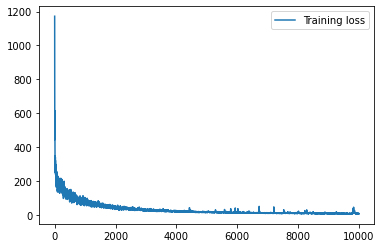

In [82]:
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [83]:
x_input = data_scaled[-12:]
print(x_input.shape)

(12, 10)


In [87]:
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)
print(yhat.shape)
yhat_shaped = yhat.reshape([15,10])
print(yhat_shaped)
print(yhat_shaped.shape)

1/1 [==============================] - 0s 13ms/step
[[ 0.48830712  0.5596703   0.655368    0.36405826 -0.15537556  0.28733984
   0.30219766  0.1636098   0.61108845  0.26544487  0.25289243  0.649822
   0.46838745  1.0582596   0.96480024  0.25381416  0.51206553  0.49847406
   0.36926815  0.49197158  0.7288823   0.90329653  1.0168881   0.2289013
  -0.10631673  0.4876348   0.5207612   0.5650184   0.9324755   0.59798235
   0.21657223  0.40031406  0.4649486   0.3609414   0.22523771  0.27200407
   0.16051966  0.2016123   0.07955214  0.55550134  0.5931536   0.24538353
   0.32236594  0.1865579  -0.4085316   0.22148195  0.0914353   0.33901277
   0.46242535  0.45529348  0.8077365   0.9712582   0.3492497   0.9538921
   0.41147906  0.6773789   0.7335075   0.9758624   0.2684268   1.282604
   0.19908671  0.20838425  0.18514593 -0.13593066 -0.36381868  0.40525556
   0.08844125  0.31525287  0.33127645  0.27407044  0.33457386  0.59074783
   0.30370438  0.44188452  0.03551585  0.5520407   0.62883914  0.5

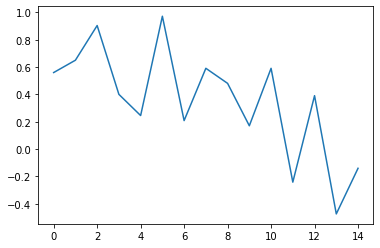

In [88]:
plt.plot(yhat_shaped[:,1])

In [89]:
y_pred_future = scaler.inverse_transform(yhat_shaped)

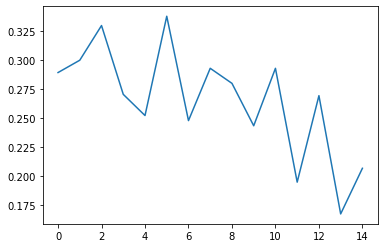

In [90]:
plt.plot(y_pred_future[:,1])

In [58]:
output = pd.DataFrame(y_pred_future)
output.to_csv('submission_Conv1D_3.csv')
print("Your submission was successfully saved!")

Your submission was successfully saved!
